# Advertising Sales Channel Prediction

Problem Statement:

Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored.

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

In [18]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [20]:
df.shape

(200, 5)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [22]:
#Check for null
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [23]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Count', '% of Missing Data'])
missing_data.head(5)

,Total Count,% of Missing Data
Unnamed: 0,0,0.0
TV,0,0.0
radio,0,0.0
newspaper,0,0.0
sales,0,0.0


So, nothing is missing

# Check for Duplicates

In [24]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Unnamed: 0,TV,radio,newspaper,sales


No Dpulicate record is found

TV : If an organisation does its advertisement via TV, how much sales can he achive and whether it will be benficial for him to do the advertisment via TV, we have to analyse that

Radio :If an organisation does its advertisement via Radio, how much sales can he achive and whether it will be benficial for him to do the advertisment via Radio, we have to analyse that

Newspaper : If an organisation does its advertisement via Newspaper, how much sales can he achive and whether it will be benficial for him to do the advertisment via newspaper, we have to analyse that

Sales : It is the total number of Sales

In [25]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Data Description

TV : If an organisation does its advertisement via TV, how much sales can he achive and whether it will be benficial for him to do the advertisment via TV, we have to analyse that. It has few areas where an organisation is spending more amount on advertisment, We will consider this as an Outlier for sometime till further analysis.

Radio :If an organisation does its advertisement via Radio, how much sales can he achive and whether it will be benficial for him to do the advertisment via Radio, we have to analyse that.It has few areas where an organisation is spending more amount on advertisment, We will consider this as an Outlier for sometime till further analysis.

Newspaper : If an organisation does its advertisement via Newspaper, how much sales can he achive and whether it will be benficial for him to do the advertisment via newspaper, we have to analyse that.It has few areas where an organisation is spending more amount on advertisment, We will consider this as an Outlier for sometime till further analysis.

Sales : It is the total number of Sales

In [26]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

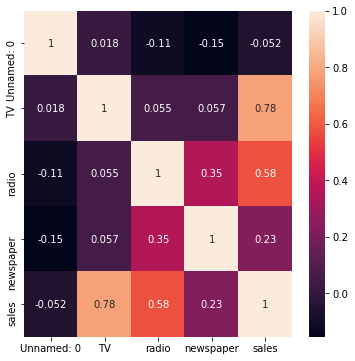

In [27]:
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(), annot = True)

TV and sales are correlated

Similarly, Radio and sales are a bit correlated

Newspaper and Sales are not correlated

In [28]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


If we see, the column Unnamed: 0 is of no use, so there is no point in keeping this column, lets delete it

In [29]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [30]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


# Outlier Checking

In [31]:
dataToPlot=df.loc[:, df.columns != 'Sales']
dataToPlot.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [32]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [33]:
targetToPlot=df.loc[:, df.columns == 'Sales']

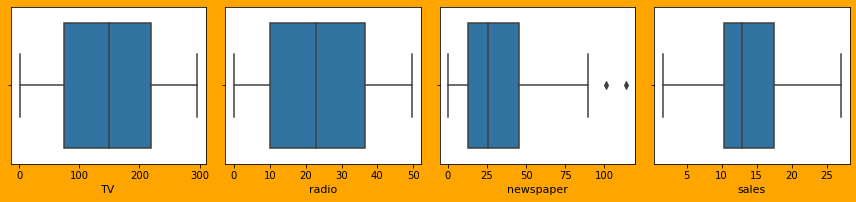

In [34]:
#Lets see data distribution
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=12:
        ax=plt.subplot(3,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

We see that only Newspaper have few outliers and rest data is fine

In [35]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<AxesSubplot:xlabel='TV', ylabel='sales'>

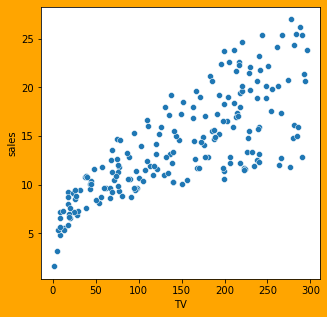

In [36]:
#Lets see data distribution using TV(Independent Variable) and Sales(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="TV",y="sales",data=df)

The graph shows that if more money is spent on advertisement through TV, the sales increases

<AxesSubplot:xlabel='radio', ylabel='sales'>

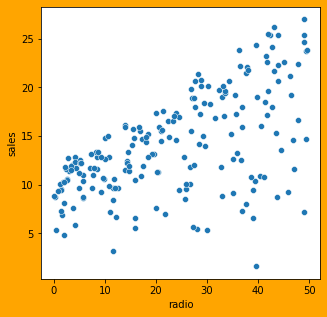

In [37]:
#Lets see data distribution using radio(Independent Variable) and Sales(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="radio",y="sales",data=df)

The graph shows that if more money is spent on advertisement through Radio, the sales increases but not that much when compared to TV, we will try to combine TV and radio to see if sales increases when advertisement is done via both TV and radio to increase the sales

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

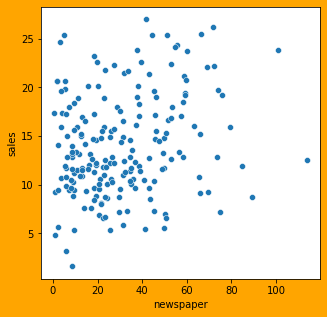

In [38]:
#Lets see data distribution using newspaper(Independent Variable) and Sales(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="newspaper",y="sales",data=df)

The graph shows that if more money is spent on advertisement through newspaper, there is no impact in Sales, so if an organisation spends more money to increase the sales via advertisement through newspaper, it will be in Loss

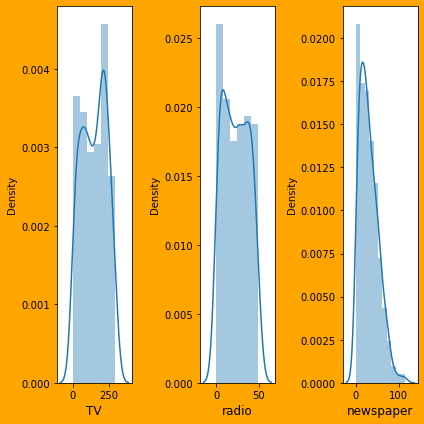

In [125]:
#Lets see data distribution again
plt.figure(figsize=(6,6),facecolor='orange')
plotnumber=1

for column in dataToPlot:
    #print(column)
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)        
        sns.distplot(dataToPlot[column])
        plt.xlabel(column,fontsize=12)
        
    plotnumber+=1   
    
plt.tight_layout()

The graph shows that if more money is spent on advertisement through newspaper, there is no impact in Sales, so if an organisation spends more money to increase the sales via advertisement through newspaper, it will be in Loss as the graph gets skewed to the right

# ZScore

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(200, 4)

In [40]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [41]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 4)
(198, 4)


In [42]:
loss_percentage= ((200-198)/200)*100
loss_percentage

1.0

Lets not delete the data as we have only 1% loss and it is not going to impact much

In [43]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [44]:
x = df.drop(['sales'], axis = 1)

# checking the shape of the dataset
print(x.shape)

(200, 3)


# Power Transform

In [45]:
#dataToPlot
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [46]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [47]:
X_vif=df.drop(columns=['sales'])
X_vif

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


# Standard Scalar

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)

In [49]:
# Finding variance Inflation factor in each scaled column i.e x.shape[1] (1/(1-R2)
# Age and Expereince, you can predict Salary, so Multi colinearity problem is there
# Thats why we first use Standard Scaler to standardise the data and then use vif

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,1.003112,TV
1,1.094332,radio
2,1.093766,newspaper


We dont see any multi collinearity problem here

In [51]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [52]:
features = df.drop("sales", axis=1)
target = df["sales"]

# determining the shape of x and y.
print(features.shape)
print(target.shape)

(200, 3)
(200,)


In [53]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(features,target)

#Print Intercept and CoEfficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [55]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales ~ TV',data=df).fit()
print("lm.rsquared     : ",lm.rsquared)
print("lm.rsquared_adj :", lm.rsquared_adj)

lm.rsquared     :  0.611875050850071
lm.rsquared_adj : 0.6099148238341623


If an Organisation spends just on advertisement via TV, the sales increases. The RSquare value and Adjusted RSquare values confirms the same

In [56]:
lm=smf.ols(formula='sales ~ radio',data=df).fit()
print("lm.rsquared     : ",lm.rsquared)
print("lm.rsquared_adj :", lm.rsquared_adj)

lm.rsquared     :  0.33203245544529536
lm.rsquared_adj : 0.32865888198794846


If an Organisation spends just on advertisement via radio, the sales doesnot increase that much but it increases a bit. The RSquare value and Adjusted RSquare values confirms the same

In [57]:
lm=smf.ols(formula='sales ~ newspaper',data=df).fit()
print("lm.rsquared     : ",lm.rsquared)
print("lm.rsquared_adj :", lm.rsquared_adj)

lm.rsquared     :  0.05212044544430516
lm.rsquared_adj : 0.04733317496675127


If an Organisation spends just on advertisement via newspaper, there is almost no impact on Sales. The RSquare value and Adjusted RSquare values confirms the same

In [58]:
lm=smf.ols(formula='sales ~ TV+radio',data=df).fit()
print("lm.rsquared     : ",lm.rsquared)
print("lm.rsquared_adj :", lm.rsquared_adj)

lm.rsquared     :  0.8971942610828956
lm.rsquared_adj : 0.8961505479974428


If an Organisation spends just on advertisement via TV and Radio both, the sales increases drastically when compared to the amount spend just on TV and Radio individually. The RSquare value and Adjusted RSquare values confirms the same

In [59]:
lm=smf.ols(formula='sales ~ TV+newspaper',data=df).fit()
print("lm.rsquared     : ",lm.rsquared)
print("lm.rsquared_adj :", lm.rsquared_adj)

lm.rsquared     :  0.6458354938293271
lm.rsquared_adj : 0.6422399150864777


If an Organisation spends just on advertisement via TV and newspaper, the sales increases due to amount spend on TV and not on newspaper. The RSquare value and Adjusted RSquare values confirms the same as it is almost equal when compared to amount spent on just TV to increase the sales

In [60]:
lm=smf.ols(formula='sales ~ radio+newspaper',data=df).fit()
print("lm.rsquared     : ",lm.rsquared)
print("lm.rsquared_adj :", lm.rsquared_adj)

lm.rsquared     :  0.33270518395032256
lm.rsquared_adj : 0.3259306172899197


If an Organisation spends just on advertisement via radio and newspaper, the sales increases due to amount spend on TV and not on newspaper. The RSquare value and Adjusted RSquare values confirms the same as it is almost equal when compared to amount spent on just radio to increase the sales

In [61]:
lm=smf.ols(formula='sales ~ TV+newspaper+radio',data=df).fit()
print("lm.rsquared     : ",lm.rsquared)
print("lm.rsquared_adj :", lm.rsquared_adj)

lm.rsquared     :  0.8972106381789522
lm.rsquared_adj : 0.8956373316204668


If an Organisation spends just on advertisement via TV, radio and newspaper, the sales increases due to amount spend on TV & radio and not on newspaper. The RSquare value and Adjusted RSquare values confirms the same as it is almost equal when compared to amount spent on just TV and radio to increase the sales

Hence it is advisable to spend money on TV and radio combinely. Lets see the RSquare, Adjusted RSquare, P-value etc in such case

In [62]:
lm=smf.ols(formula='sales ~ TV +radio',data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           4.83e-98
Time:                        01:38:19   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Dividing the dataset into Features and Target

In [63]:
df.head(1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LinearRegression()
from sklearn.metrics import accuracy_score

# Train-Test Split

In [65]:
x_train, x_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=5)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [66]:
print('Intercept',lr.intercept_)
print('TV',lr.coef_[0])
print('Radio',lr.coef_[1])
print('NewsPapaer',lr.coef_[2])

Intercept 2.931280343575775
TV 0.04688034130700544
Radio 0.18243279575750576
NewsPapaer -0.0016467403865370904


In [67]:
from sklearn import metrics

In [68]:
# calculate MAE, MSE, RMSE on Train Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

mean_absolute_error : 1.2627588445974747
mean_squared_error :  2.8639563073255165
root_mean_squared_error :  1.6923227550693505


In [69]:
# calculate MAE, MSE, RMSE on Test Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_test))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_test))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

mean_absolute_error : 1.2673937159929243
mean_squared_error :  2.5509646159531068
root_mean_squared_error :  1.5971739466799184


MSE is more popular than MAE because MSE “eliminates” larger errors. But, RMSE is even more better than MSE because RMSE is interpretable in the “y” units.

We are going to invest in TV and Radio and not on newspaper.

There is no relationship between Newspaper and sales, hence here we fail to reject Null Hypothesis

For TV and Radio, We reject Null Hypothesis

# Cross-Validation of the model

In [72]:
from sklearn.metrics import r2_score

train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy} ")
    print("\n")

At cross fold 2 the cv score is 0.8908473589845056 and accuracy score for training is 0.8956962280033929 and accuracy for the testing is 0.8984204533332627 


At cross fold 3 the cv score is 0.8916464591145559 and accuracy score for training is 0.8956962280033929 and accuracy for the testing is 0.8984204533332627 


At cross fold 4 the cv score is 0.8900070660549507 and accuracy score for training is 0.8956962280033929 and accuracy for the testing is 0.8984204533332627 


At cross fold 5 the cv score is 0.8871063495438436 and accuracy score for training is 0.8956962280033929 and accuracy for the testing is 0.8984204533332627 


At cross fold 6 the cv score is 0.8899208882186672 and accuracy score for training is 0.8956962280033929 and accuracy for the testing is 0.8984204533332627 


At cross fold 7 the cv score is 0.8859930219823539 and accuracy score for training is 0.8956962280033929 and accuracy for the testing is 0.8984204533332627 


At cross fold 8 the cv score is 0.882668668991

We will select CV=5

In [73]:
lr_data = {'Model': ['Linear Regression'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_test),'MSE':metrics.mean_squared_error(y_test, pred_test),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
           'R2 Score': r2_score(y_test,pred_test),
           'CV Score': (cross_val_score(lr,features,target,cv=5).mean()),
           'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, pred_train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))          
          }  

df_LR = pd.DataFrame(lr_data)  
df_LR

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Linear Regression,1.267394,2.550965,1.597174,0.89842,0.887106,0.095149


# Regularization Techniques

Once we use linear regression on a data-set divided in to training and test set, calculating the scores on training and test set can give us a rough idea about whether the model is suffering from over-fitting or under-fitting.

If we have very few features on a data-set and the score is poor for both training and test set then it’s a problem of under-fitting. On the other hand if we have large number of features and test score is relatively poor than the training score then it’s the problem of over-fitting.

Regularization is a simple technique to reduce model complexity and prevent over-fitting which may result from simple linear regression.

# Ridge

In [78]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.9,max_iter=50, normalize=True)

ridgeReg.fit(x_train,y_train)
ridge_pred = ridgeReg.predict(x_test)
ridge_pred_train = ridgeReg.predict(x_train)

# RMSE
print("r2_score",r2_score(y_test,ridge_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, ridge_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, ridge_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

r2_score 0.7232684203268891
mean_absolute_error : 2.179171973590628
mean_squared_error :  6.949553242041344
root_mean_squared_error :  2.6362005314545676


In [79]:
print(ridgeReg.intercept_)
print(ridgeReg.coef_)

7.659884504161116
[0.02502313 0.09632279 0.0119806 ]


In [87]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.1, max_iter=50,normalize=True)

ridgeReg.fit(x_train,y_train)
ridge_pred = ridgeReg.predict(x_test)
ridge_pred_train = ridgeReg.predict(x_train)

# RMSE
print("r2_score",r2_score(y_test,ridge_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, ridge_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, ridge_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("Cross Validation Score : ",cross_val_score(ridgeReg,features,target,cv=5).mean())

r2_score 0.896138822290615
mean_absolute_error : 1.3107857586773835
mean_squared_error :  2.6082631592863406
root_mean_squared_error :  1.6150118139773284
Cross Validation Score :  0.8810861338185928


In [81]:
print(ridgeReg.intercept_)
print(ridgeReg.coef_)

3.7938716179146024
[0.04271737 0.16505583 0.00293251]


Cross Validation of Ridge

In [88]:
# RMSE
print("r2_score",r2_score(y_train,ridge_pred_train))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, ridge_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, ridge_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, ridge_pred_train)))
print ("Cross Validation Score : ", (cross_val_score(ridgeReg,features,target,cv=5).mean()))

r2_score 0.8886769078120739
mean_absolute_error : 1.2904796234300717
mean_squared_error :  3.0566916796926753
root_mean_squared_error :  1.7483396923060104
Cross Validation Score :  0.8810861338185928


In [89]:
ridge_data = {'Model': ['Ridge'], 
           'MAE': metrics.mean_absolute_error(y_test, ridge_pred),'MSE':metrics.mean_squared_error(y_test, ridge_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)),
           'R2 Score': r2_score(y_test,ridge_pred),
           'CV Score': (cross_val_score(ridgeReg,features,target,cv=5).mean()),
           'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, ridge_pred_train)))-(np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))          
          }  

df_Ridge = pd.DataFrame(ridge_data)  
df_Ridge

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Ridge,1.310786,2.608263,1.615012,0.896139,0.881086,0.133328


As we can see, as we increase the value of alpha, the magnitude of the coefficients decreases, where the values reaches to zero but not absolute zero.

We have to choose the value of alpha wisely by iterating it through a range of values and using the one which gives us the lowest error.

# Lasso

In [90]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.9,max_iter=50, normalize=True)

lassoReg.fit(x_train,y_train)
lassoReg_pred = lassoReg.predict(x_test)
lasso_train=lassoReg.predict(x_train)
# RMSE
print("r2_score",r2_score(y_test,lassoReg_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, lassoReg_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, lassoReg_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, lassoReg_pred)))
print("Cross Validation Score is :",(cross_val_score(lassoReg,features,target,cv=5).mean()))

r2_score -0.024110186691342017
mean_absolute_error : 4.32834375
mean_squared_error :  25.718453515625004
root_mean_squared_error :  5.071336462474661
Cross Validation Score is : -0.019858529714162288


In [91]:
print(lassoReg.intercept_)
print(lassoReg.coef_)

13.866874999999999
[0. 0. 0.]


In [92]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1,max_iter=50, normalize=True)

lassoReg.fit(x_train,y_train)
lassoReg_pred = lassoReg.predict(x_test)
lasso_train=lassoReg.predict(x_train)

# RMSE
print("r2_score",r2_score(y_test,lassoReg_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, lassoReg_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, lassoReg_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, lassoReg_pred)))
print("Cross Validation Score is :",(cross_val_score(lassoReg,features,target,cv=5).mean()))

r2_score 0.777905586790177
mean_absolute_error : 1.9163063439671568
mean_squared_error :  5.577451446577958
root_mean_squared_error :  2.3616628562472584
Cross Validation Score is : 0.7748022612146763


In [93]:
print(lassoReg.intercept_)
print(lassoReg.coef_)

6.796919625430863
[0.03293273 0.10047825 0.        ]


In a large dataset (10,000 features) some of the independent features correlates with other independent features.

If we apply ridge regression to it, it will retain all of the features but will shrink the coefficients. But the model will still remain complex (10,000 features), thus may lead to poor performance.

If we apply lasso regression to it, it retains only one correlated variable and sets other correlated variables to zero. That will possibly lead to some loss of information resulting in lower accuracy in the model.



In [94]:
# RMSE
print("r2_score",r2_score(y_train,lasso_train))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, lasso_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, lasso_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, lasso_train)))
print ("Cross Validation Score : ", (cross_val_score(lassoReg,features,target,cv=5).mean()))

r2_score 0.785455022220767
mean_absolute_error : 1.8054807242693909
mean_squared_error :  5.890941722949714
root_mean_squared_error :  2.4271262272386482
Cross Validation Score :  0.7748022612146763


In [95]:
lasso_data = {'Model': ['Lasso'], 
           'MAE': metrics.mean_absolute_error(y_test, lassoReg_pred),'MSE':metrics.mean_squared_error(y_test, lassoReg_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, lassoReg_pred)),
           'R2 Score': r2_score(y_test,lassoReg_pred),
           'CV Score': (cross_val_score(lassoReg,features,target,cv=5).mean()),
           'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, lasso_train)))-(np.sqrt(metrics.mean_squared_error(y_test, lassoReg_pred)))
          }  

df_Lasso = pd.DataFrame(lasso_data)  
df_Lasso

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Lasso,1.916306,5.577451,2.361663,0.777906,0.774802,0.065463


# Decison Tree Regression

In [96]:
from sklearn.tree import DecisionTreeRegressor

# creating model
decTree = DecisionTreeRegressor()

In [97]:
dt=DecisionTreeRegressor(criterion="mse",max_features="auto",min_samples_split= 7, splitter= "best")

dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dt=dt.predict(x_test)
pred_dt_train=dt.predict(x_train)

In [98]:
print("r2_score",r2_score(y_test,pred_dt))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_dt))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_dt))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_dt)))
print ("Cross Validation Score : ", (cross_val_score(dt,features,target,cv=5).mean()))

r2_score 0.9509342226920988
mean_absolute_error : 0.8108333333333336
mean_squared_error :  1.2321876388888897
root_mean_squared_error :  1.110039476275006
Cross Validation Score :  0.9522273757915614


In [99]:
print("r2_score",r2_score(y_train,pred_dt_train))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_dt_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_dt_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_dt_train)))
print ("Cross Validation Score : ", (cross_val_score(dt,features,target,cv=5).mean()))

r2_score 0.9899673843251349
mean_absolute_error : 0.38654166666666656
mean_squared_error :  0.2754739583333333
root_mean_squared_error :  0.5248561310810167
Cross Validation Score :  0.9513079929881183


In [100]:
decTree_data = {'Model': ['Decision Tree'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_dt),'MSE':metrics.mean_squared_error(y_test, pred_dt),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_dt)),
           'R2 Score': r2_score(y_test,pred_dt),
           'CV Score': (cross_val_score(dt,features,target,cv=5).mean()),
           'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, pred_dt_train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_dt)))
          }  

df_DT = pd.DataFrame(decTree_data)  
df_DT

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Decision Tree,0.810833,1.232188,1.110039,0.950934,0.951014,-0.585183


# Random Forest Regressor

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [102]:
rf=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=100,bootstrap=True)

rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_RF=rf.predict(x_test)
pred_RF_train=rf.predict(x_train)

In [103]:
print("r2_score",r2_score(y_test,pred_RF))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_RF))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_RF))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_RF)))
print ("Cross Validation Score : ", (cross_val_score(rf,features,target,cv=5).mean()))

r2_score 0.987351515501449
mean_absolute_error : 0.45247499999999874
mean_squared_error :  0.31764107499999883
root_mean_squared_error :  0.5635965533961318
Cross Validation Score :  0.9780442061088352


In [104]:
print("r2_score",r2_score(y_train,pred_RF_train))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_RF_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_RF_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_RF_train)))
print ("Cross Validation Score : ", (cross_val_score(rf,features,target,cv=5).mean()))

r2_score 0.9971855035541634
mean_absolute_error : 0.21918124999999913
mean_squared_error :  0.07727999374999964
root_mean_squared_error :  0.2779927944210059
Cross Validation Score :  0.9755146491082494


In [105]:
randomForest_data = {'Model': ['Random Forest'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_RF),'MSE':metrics.mean_squared_error(y_test, pred_RF),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_RF)),
           'R2 Score': r2_score(y_test,pred_RF),
           'CV Score': (cross_val_score(rf,features,target,cv=5).mean()),
           'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, pred_RF_train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_RF)))
          }  

df_RF = pd.DataFrame(randomForest_data)  
df_RF

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Random Forest,0.452475,0.317641,0.563597,0.987352,0.97576,-0.285604


In [106]:
modelDF=pd.concat([df_LR,df_Ridge,df_Lasso,df_DT,df_RF]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Linear Regression,1.267394,2.550965,1.597174,0.898420,0.887106,0.095149
1,Ridge,1.310786,2.608263,1.615012,0.896139,0.881086,0.133328
2,Lasso,1.916306,5.577451,2.361663,0.777906,0.774802,0.065463
3,Decision Tree,0.810833,1.232188,1.110039,0.950934,0.951014,-0.585183
4,Random Forest,0.452475,0.317641,0.563597,0.987352,0.975760,-0.285604


Random Forest Regressor performs the best, so lets use the Random Forest for our prediction. Lower the RMSe, best is the model.

# Saving the model

In [115]:
from joblib import dump , load
#filename="SalesAdvertisement.pkl"
dump(rf,'SalesAdvertisement.joblib')
load_rf=load('SalesAdvertisement.joblib')

In [117]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'SalesAdvertisement.joblib')

In [118]:
import joblib
joblib.dump(load_rf, filename) 
#['...SalesAdvertisement.joblib']

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmp86dutiv6\\SalesAdvertisement.joblib']

In [119]:
joblib.load(filename)

RandomForestRegressor(criterion='mae')